In [1]:
import numpy as np
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import IBMQ, Aer, transpile, assemble
from qiskit.providers.ibmq import least_busy
from qiskit.visualization import plot_histogram, plot_bloch_multivector
from qiskit.extensions import Initialize
from qiskit_textbook.tools import random_state, array_to_latex
import matplotlib.pyplot
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Defining srtucture of the circuit

circuit = QuantumCircuit(3,1)

<IPython.core.display.Math object>

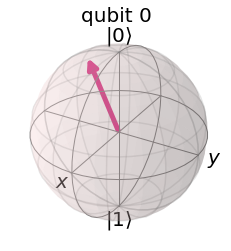

In [3]:
#Creating a qubit in random state
psi = random_state(1)

# Display it nicely
array_to_latex(psi, pretext="|\\psi\\rangle =")
# Show it on a Bloch sphere
plot_bloch_multivector(psi)

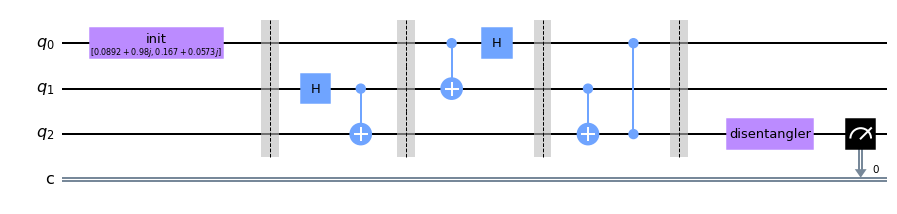

In [4]:
init_gate = Initialize(psi)
init_gate.label = "init"

#append inti gate to the qc
circuit.append(init_gate, [0])
circuit.barrier()

#Creating entanglement in q1 and q2
circuit.h(1)
circuit.cx(1,2)
circuit.barrier()

#Defining gates for sender
circuit.cx(0,1)
circuit.h(0)
circuit.barrier()

#reciever gates (different as no operations can be performed after measuring on hardware)
circuit.cx(1,2)
circuit.cz(0,2)
circuit.barrier()

#to measure the 3rd qubit
inverse_init_gate = init_gate.gates_to_uncompute()
circuit.append(inverse_init_gate, [2])

#measure
circuit.measure(2,0)

circuit.draw('mpl')

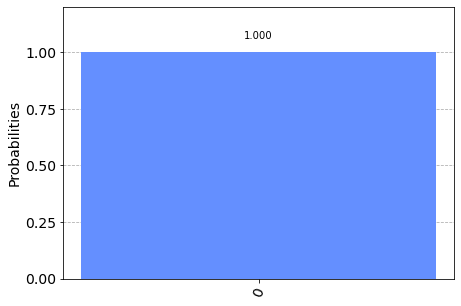

In [5]:
#Using Quasm Simulator

qasm_sim = Aer.get_backend('qasm_simulator')
t_qc = transpile(circuit, qasm_sim)
qobj = assemble(t_qc)
counts = qasm_sim.run(qobj).result().get_counts()
plot_histogram(counts)

In [6]:
IBMQ.load_account()
provider = IBMQ.get_provider(hub='ibm-q')
provider.backends()
backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits <= 5 and
                                   x.configuration().n_qubits >= 2 and
                                   not x.configuration().simulator and x.status().operational==True))
print("least busy backend: ", backend)

least busy backend:  ibmq_belem


In [7]:
# Run our circuit on the least busy backend. Monitor the execution of the job in the queue
from qiskit.tools.monitor import job_monitor

shots = 1024
transpiled_circuit = transpile(circuit, backend)
qobj = assemble(transpiled_circuit, shots=shots)
job = backend.run(qobj)

job_monitor(job, interval=2)

<ipython-input-7-5b5f2cdaff9c>:7: DeprecationWarning: Passing a Qobj to Backend.run is deprecated and will be removed in a future release. Please pass in circuits or pulse schedules instead.
  job = backend.run(qobj)


Job Status: job has successfully run


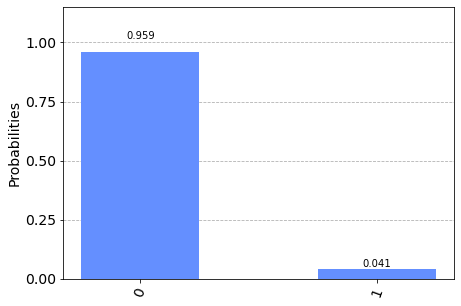

In [8]:
results = job.result()
answer = results.get_counts()

plot_histogram(answer)